In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
original = pd.read_csv("../../data/processed/original.csv")
synthetic = pd.read_csv("../../data/processed/synthetic.csv")

data = pd.concat([original, synthetic], keys=[1, 2]).drop_duplicates().dropna()

In [3]:
data.head()

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
1 0       1   69        1               2        2              1   
  1       1   74        2               1        1              1   
  2       2   59        1               1        1              2   
  3       1   63        2               2        2              1   
  4       2   63        1               2        1              1   

     CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
1 0                1        2        1         2                  2         2   
  1                2        2        2         1                  1         1   
  2                1        2        1         2                  1         2   
  3                1        1        1         1                  2         1   
  4                1        1        1         2                  1         2   

     SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
1 0                    2                      2           2            1  
  1                    2                      2           2            1  
  2                    2                      1           2            0  
  3                    1                      2           2            0  
  4                    2                      1           1            0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 462 entries, (1, 0) to (2, 190)
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 462 non-null    int64
 1   AGE                    462 non-null    int64
 2   SMOKING                462 non-null    int64
 3   YELLOW_FINGERS         462 non-null    int64
 4   ANXIETY                462 non-null    int64
 5   PEER_PRESSURE          462 non-null    int64
 6   CHRONIC DISEASE        462 non-null    int64
 7   FATIGUE                462 non-null    int64
 8   ALLERGY                462 non-null    int64
 9   WHEEZING               462 non-null    int64
 10  ALCOHOL CONSUMING      462 non-null    int64
 11  COUGHING               462 non-null    int64
 12  SHORTNESS OF BREATH    462 non-null    int64
 13  SWALLOWING DIFFICULTY  462 non-null    int64
 14  CHEST PAIN             462 non-null    int64
 15  LUNG_CANCER            462 non

In [5]:
data.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,1.413420,61.541126,1.445887,1.387446,1.324675,1.329004,1.367965,1.500000,1.335498,1.348485,1.341991,1.363636,1.502165,1.285714,1.383117,0.515152
std,0.492981,8.554625,0.497602,0.487695,0.468761,0.470361,0.482775,0.500542,0.472676,0.477007,0.474891,0.481567,0.500537,0.452244,0.486673,0.500312
min,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,61.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,2.000000,67.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


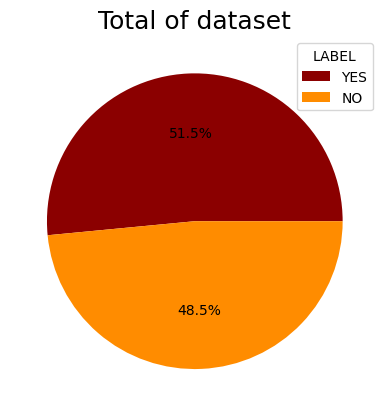

In [6]:
# plot the total set of dataset.
total = data['LUNG_CANCER'].value_counts()

plt.pie(total, colors=['darkred', 'darkorange'], autopct='%1.1f%%')

plt.title('Total of dataset', size=18)
plt.legend(['YES', 'NO'], loc='upper right', title='LABEL')

plt.savefig('../../figures/eda/synthetic/total_dataset.png')
plt.show()

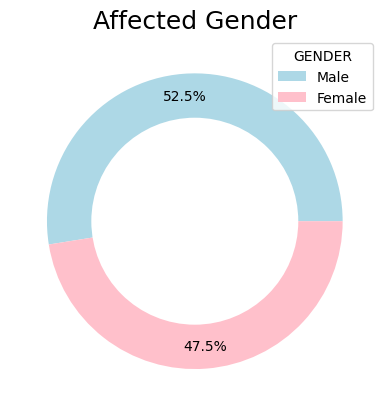

In [7]:
# Select the gender of patients that affected.
male = data[(data['GENDER'] == 1) & (data['LUNG_CANCER'] == 1)].shape[0]
female = data[(data['GENDER'] == 2) & (data['LUNG_CANCER'] == 1)].shape[0]

plt.pie([male, female], colors=['lightblue', 'pink'], pctdistance=0.85, autopct='%1.1f%%')
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))

plt.title('Affected Gender', size=18)
plt.legend(['Male', 'Female'], loc='upper right', title='GENDER')

plt.savefig('../../figures/eda/synthetic/affected_gender.png')
plt.show()

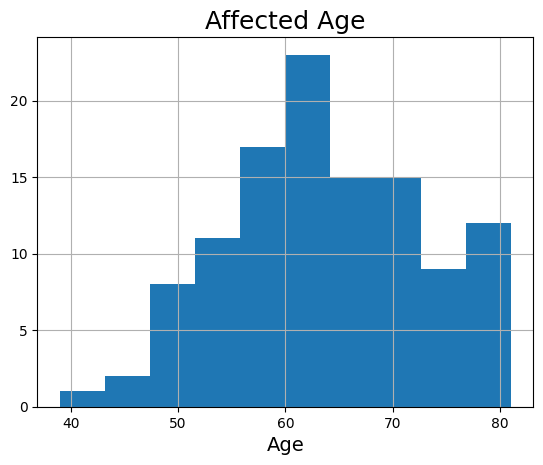

In [8]:
# Select only the affected age of patients.
age = data[(data['AGE']) & (data['LUNG_CANCER'] == 1)]

age = age.get('AGE')

plt.hist(age)
plt.title('Affected Age', size=18)
plt.xlabel('Age', size=14)

plt.grid(True)

plt.savefig('../../figures/eda/synthetic/affected_age.png')
plt.show()

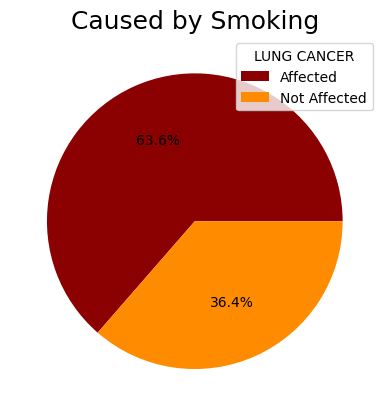

In [9]:
# Select the patients who are affected & not affected of lung cancer who smoke.
smoked_affected = data[(data['SMOKING'] == 2) & (data['LUNG_CANCER'] == 1)].shape[0]
smoked_not_affected = data[(data['SMOKING'] == 2) & (data['LUNG_CANCER'] == 0)].shape[0]

plt.pie([smoked_affected, smoked_not_affected], colors=['darkred', 'darkorange'], autopct='%1.1f%%')

plt.title('Caused by Smoking', size=18)
plt.legend(['Affected', 'Not Affected'], loc='upper right', title='LUNG CANCER')

plt.savefig('../../figures/eda/synthetic/caused_by_smoking.png')
plt.show()

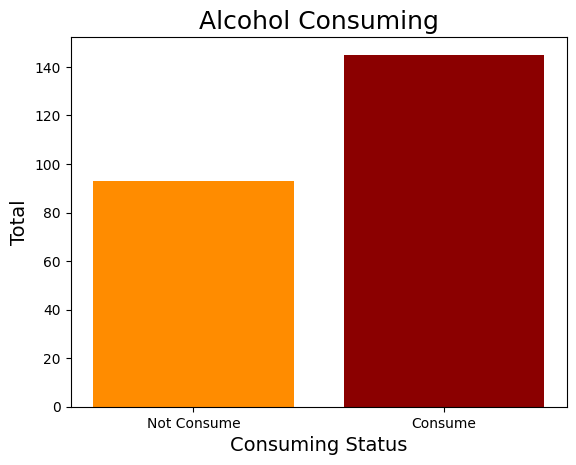

In [10]:
# Select the affected patients who consume alcohol.
no_consuming = data[(data['ALCOHOL CONSUMING'] == 1) & (data['LUNG_CANCER'] == 1)].shape[0]
consuming = data[(data['ALCOHOL CONSUMING'] == 2) & (data['LUNG_CANCER'] == 1)].shape[0]

plt.bar(['Not Consume', 'Consume'], [no_consuming, consuming], color=['darkorange', 'darkred'])

plt.title('Alcohol Consuming', size=18)
plt.xlabel('Consuming Status', size=14)
plt.ylabel('Total', size=14)

plt.savefig('../../figures/eda/synthetic/alcohol_consuming.png')
plt.show()

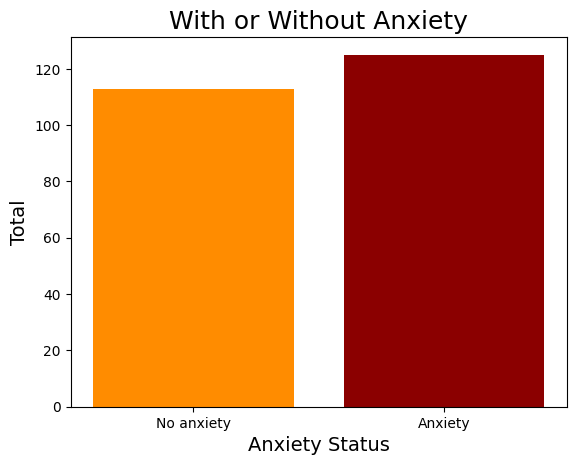

In [11]:
# Select the affected patients who experinces or not experinces the anxiety.
no_anxiety = data[(data['ANXIETY'] == 1) & (data['LUNG_CANCER'] == 1)].shape[0]
anxiety = data[(data['ANXIETY'] == 2) & (data['LUNG_CANCER'] == 1)].shape[0]

plt.bar(['No anxiety', 'Anxiety'], [no_anxiety, anxiety], color=['darkorange', 'darkred'])

plt.title('With or Without Anxiety', size=18)
plt.xlabel('Anxiety Status', size=14)
plt.ylabel('Total', size=14)

plt.savefig('../../figures/eda/synthetic/with_or_without_anxiety.png')
plt.show()

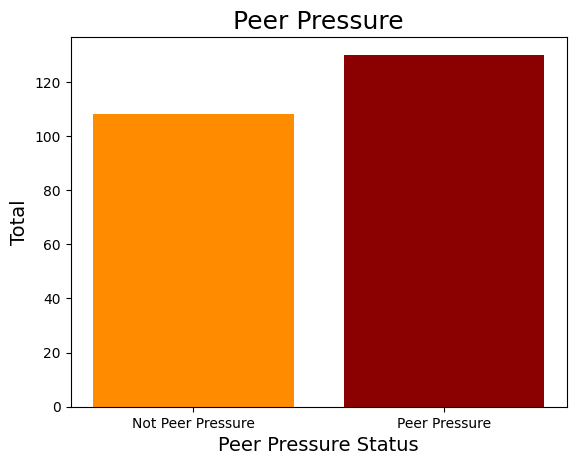

In [12]:
# Select influences.
not_peer_pressure = data[(data['PEER_PRESSURE'] == 1) & (data['LUNG_CANCER'] == 1)].shape[0]
peer_pressure = data[(data['PEER_PRESSURE'] == 2) & (data['LUNG_CANCER'] == 1)].shape[0]

plt.bar(['Not Peer Pressure', 'Peer Pressure'], [not_peer_pressure, peer_pressure], color=['darkorange', 'darkred'])

plt.title('Peer Pressure', size=18)
plt.xlabel('Peer Pressure Status', size=14)
plt.ylabel('Total', size=14)

plt.savefig('../../figures/eda/synthetic/peer_pressure.png')
plt.show()

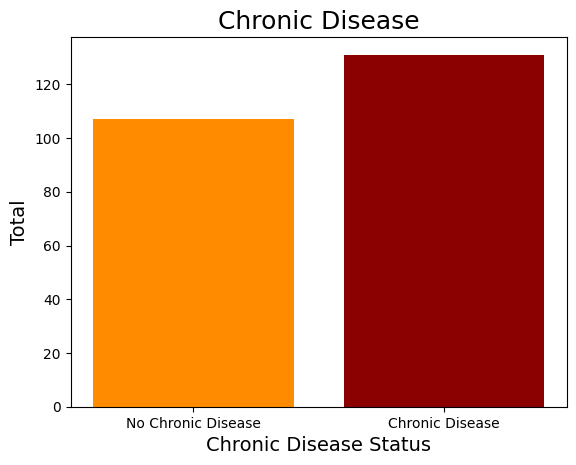

In [13]:
# Select the affected patients who have long lasting conditions.
no_chronic_disease = data[(data['CHRONIC DISEASE'] == 1) & (data['LUNG_CANCER'] == 1)].shape[0]
chronic_disease = data[(data['CHRONIC DISEASE'] == 2) & (data['LUNG_CANCER'] == 1)].shape[0]

plt.bar(['No Chronic Disease', 'Chronic Disease'], [no_chronic_disease, chronic_disease], color=['darkorange', 'darkred'])

plt.title('Chronic Disease', size=18)
plt.xlabel('Chronic Disease Status', size=14)
plt.ylabel('Total', size=14)

plt.savefig('../../figures/eda/synthetic/chronic_disease.png')
plt.show()

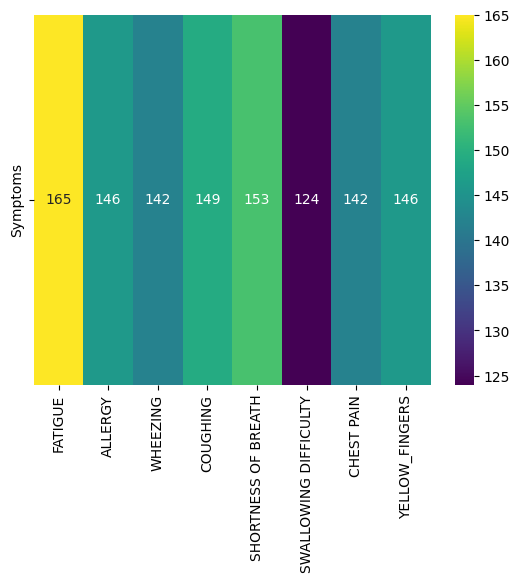

In [14]:
# Select the different symptoms factors.
cancer = data[data['LUNG_CANCER'] == 1]
symptoms = ['FATIGUE', 'ALLERGY', 'WHEEZING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'YELLOW_FINGERS']

data_symptoms = [[(cancer[symptoms] == 2).sum() for symptoms in symptoms]]

sns.heatmap(data_symptoms, cmap='viridis', annot=True, fmt='d', xticklabels=symptoms, yticklabels=['Symptoms'])

plt.savefig('../../figures/eda/synthetic/symptoms.png')
plt.show()

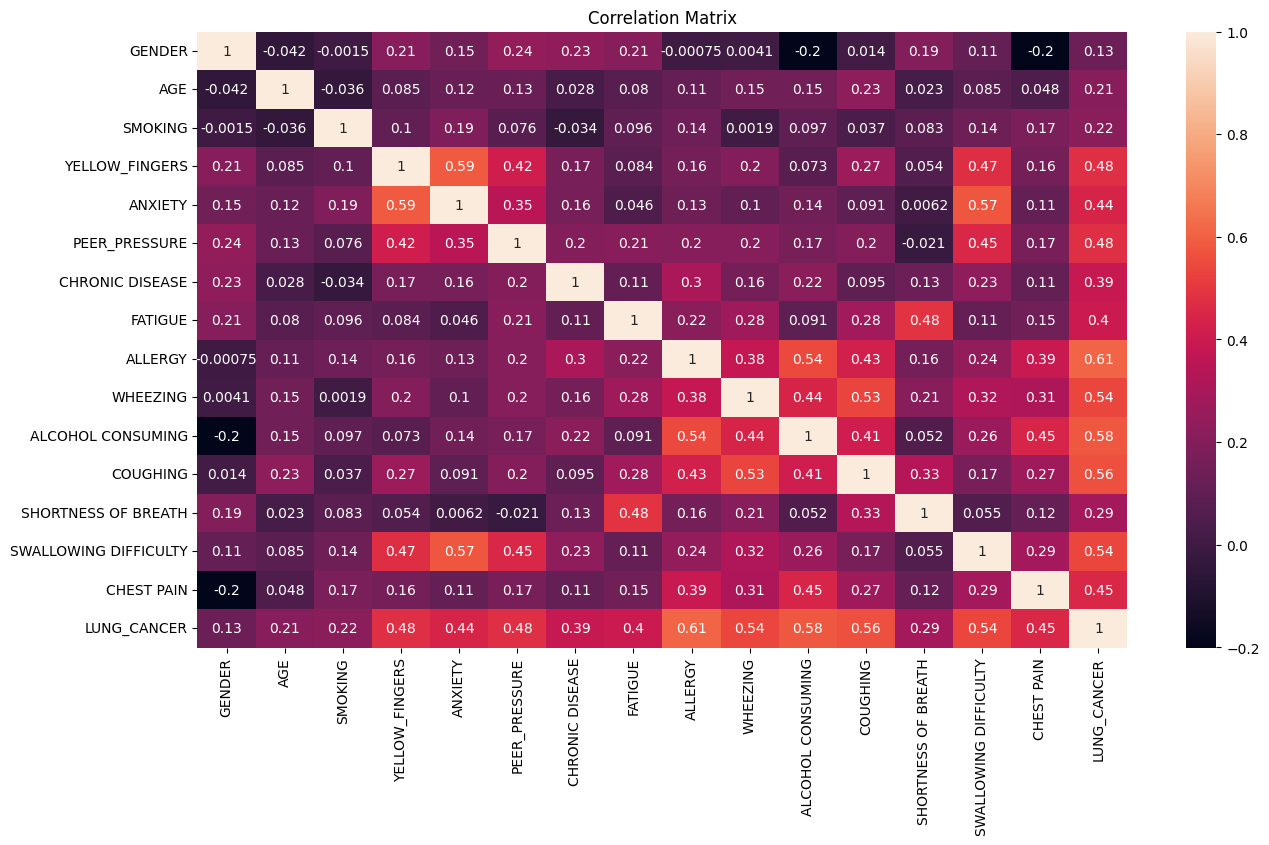

In [15]:
# Correlations
fig, ax = plt.subplots(figsize=(15, 8))

sns.heatmap(data.corr(method='pearson'), annot=True, ax=ax)
plt.title('Correlation Matrix')

plt.savefig('../../figures/eda/synthetic/correlations.png')
plt.show()

# **Summary**
* **The dataset was improve a bit** - (pie chart)
* **The male patients was more affected compare to female** - (doughnut chart)
* **The most affected age was in 60s in some patients** - (histogram chart)
* **Smokers are prone to disease chart** - (pie chart)
* **Some affected patients was also a drinkers** - (bar chart)
* **Anxiety was common for affected patients** - (bar chart)
* **Some was cause by infleunce by others to intake** - (bar chart)
* **Some patient was experinces long lasting conditions** - (bar chart)
* **Some affected patient dexperince the different symptoms** - (heatmap)
* **correlation highlights several potential associations, particularly between certain respiratory symptoms (coughing, shortness of breath, wheezing), lifestyle factors (smoking, alcohol consumption, peer pressure), conditions (yellow fingers, anxiety, chronic disease)** - (heatmap)